In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip.zip to archive.zip.zip


In [ ]:
import zipfile
import os

# Replace 'your_zip_file.zip' with the actual name of your zip file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')  # This extracts the files to the current working directory

# List the files extracted
extracted_files = os.listdir('/content/')
print(extracted_files)  # This will print the names of the files inside the zip

['.config', 'C:\\Users\\HP\\Downloads\\extracted_files', 'archive.zip', 'tmdb_5000_credits.csv', 'tmdb_5000_movies.csv', 'sample_data']


In [ ]:
import pandas as pd

# Replace with the actual filenames of the extracted files
df1 = pd.read_csv(r'tmdb_5000_credits.csv')  # First file
df2 = pd.read_csv(r'tmdb_5000_movies.csv')  # Second file

# Check the first few rows of the files to understand their structure
print(df1.head())
print(df2.head())


   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3",

In [ ]:
# Check the first few rows to understand the data
print(df1.head())

# Check the summary statistics for numerical columns
print(df1.describe())

# Check the structure of the dataset (column names, data types, etc.)
print(df1.info())

# Check for missing values
print(df1.isnull().sum())

   movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3",

In [ ]:
df1 = df1.dropna()  # Drop rows with missing values

In [ ]:
print(df1.columns)
print(df2.columns)

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [ ]:
# Target variable
target = 'revenue'

# Features (input variables)
features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']

# Use df2 for the features and target variable
X = df2[features]  # Features
y = df2[target]    # Target variable

# Print the first few rows to verify
print(X.head())
print(y.head())


      budget  popularity  runtime  vote_average  vote_count
0  237000000  150.437577    162.0           7.2       11800
1  300000000  139.082615    169.0           6.9        4500
2  245000000  107.376788    148.0           6.3        4466
3  250000000  112.312950    165.0           7.6        9106
4  260000000   43.926995    132.0           6.1        2124
0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64


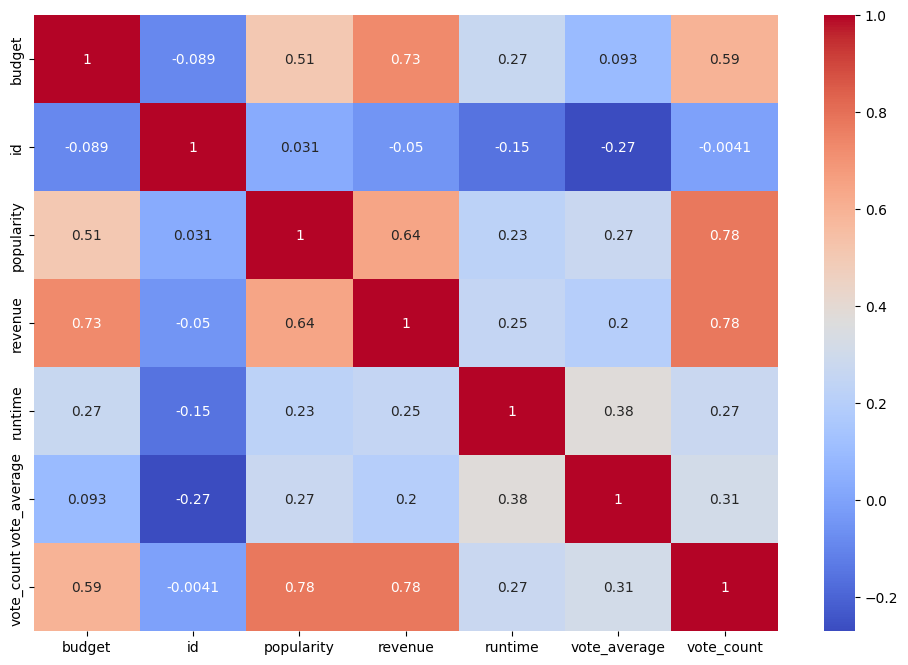

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns from df2
numerical_df = df2.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Verify the columns first
print(df2.columns)

# Drop columns if they exist
df2 = df2.drop(columns=['genres', 'overview'], errors='ignore')

# Check the updated DataFrame
print(df2.head())

print(df2.columns)


Index(['budget', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
      budget                                      homepage      id  \
0  237000000                   http://www.avatarmovie.com/   19995   
1  300000000  http://disney.go.com/disneypictures/pirates/     285   
2  245000000   http://www.sonypictures.com/movies/spectre/  206647   
3  250000000            http://www.thedarkknightrises.com/   49026   
4  260000000          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 8

In [ ]:
# Replace 'target_column' with 'revenue'
X = df2.drop(columns=['revenue'])  # Features
y = df2['revenue']  # Target

# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the features and target in the training set
print("First few rows of the features (X_train):")
print(X_train.head())

print("\nFirst few rows of the target (y_train):")
print(y_train.head())

# Display the dimensions of the splits (optional but useful)
print("\nDimensions of the splits:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


First few rows of the features (X_train):
        budget                                           homepage     id  \
4687         0                    http://www.gooddickthefilm.com/  14758   
2951  11000000       http://www.cbsfilms.com/inside-llewyn-davis/  86829   
4071   2000000  http://www.mgm.com/view/movie/717/From-Russia-...    657   
4579    400000      http://www.sonypictures.com/cthe/montypython/    762   
2197  20000000               http://www.whatsyournumbermovie.com/  63492   

                                               keywords original_language  \
4687  [{"id": 738, "name": "sexuality"}, {"id": 1253...                en   
2951  [{"id": 6382, "name": "folk music"}, {"id": 67...                en   
4071  [{"id": 110, "name": "venice"}, {"id": 212, "n...                en   
4579  [{"id": 113, "name": "holy grail"}, {"id": 345...                en   
2197  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                       original_title 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming df2 is your DataFrame
# Step 1: Drop the target column ('revenue') and split the data into features and target
X = df2.drop(columns=['revenue'])  # Features
y = df2['revenue']  # Target

# Step 2: Select only numeric columns for the features (X)
X = X.select_dtypes(include=['float64', 'int64'])

# Step 3: Drop rows with missing values in the features or target
X = X.dropna()
y = y[X.index]  # Make sure y is aligned with the rows of X

# Step 4: Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict on the test data
y_pred = model.predict(X_test)

# Optional: Print the first 5 predictions
print(y_pred[:5])


[ 1.18903217e+08 -1.30020925e+07  1.06611865e+07  7.03011141e+07
  7.77571813e+08]


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 6286041512056853.0
R-squared: 0.7604885001201346
